In [1]:
from google.colab import drive

In [2]:
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
import os
import shutil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [4]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("muhammetvarl/laptop-price")

print("Path to dataset files:", path)

100%|██████████| 28.0k/28.0k [00:00<00:00, 31.5MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/muhammetvarl/laptop-price/versions/1


In [8]:
dataset_folder_path = '/content/drive/MyDrive/Datasets'
laptop_folder_path = os.path.join(dataset_folder_path,"laptop price")

os.makedirs(laptop_folder_path,exist_ok=True)

for filename in os.listdir(path):
  shutil.move(os.path.join(path,filename) ,os.path.join(laptop_folder_path,filename))

print(f"Dataset downloaded to{laptop_folder_path}")

Dataset downloaded to/content/drive/MyDrive/Datasets/laptop price


In [10]:
import chardet

# Open the file in binary mode and read a sample of the data
with open("/content/drive/MyDrive/Datasets/laptop price/laptop_price.csv", 'rb') as f:
    raw_data = f.read()

# Detect the encoding
result = chardet.detect(raw_data)
print(result)

{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}


In [11]:
import pandas as pd

# Read the CSV file with the detected encoding
df = pd.read_csv("/content/drive/MyDrive/Datasets/laptop price/laptop_price.csv", encoding='ISO-8859-1')

# Display the first few rows of the DataFrame
print(df.head())

   laptop_ID Company      Product   TypeName  Inches  \
0          1   Apple  MacBook Pro  Ultrabook    13.3   
1          2   Apple  Macbook Air  Ultrabook    13.3   
2          3      HP       250 G6   Notebook    15.6   
3          4   Apple  MacBook Pro  Ultrabook    15.4   
4          5   Apple  MacBook Pro  Ultrabook    13.3   

                     ScreenResolution                         Cpu   Ram  \
0  IPS Panel Retina Display 2560x1600        Intel Core i5 2.3GHz   8GB   
1                            1440x900        Intel Core i5 1.8GHz   8GB   
2                   Full HD 1920x1080  Intel Core i5 7200U 2.5GHz   8GB   
3  IPS Panel Retina Display 2880x1800        Intel Core i7 2.7GHz  16GB   
4  IPS Panel Retina Display 2560x1600        Intel Core i5 3.1GHz   8GB   

                Memory                           Gpu  OpSys  Weight  \
0            128GB SSD  Intel Iris Plus Graphics 640  macOS  1.37kg   
1  128GB Flash Storage        Intel HD Graphics 6000  macOS  1.34kg   

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [13]:
df.shape

(1303, 13)

In [14]:
df.describe()

,laptop_ID,Inches,Price_euros
count,1303.000000,1303.000000,1303.000000
mean,660.155794,15.017191,1123.686992
std,381.172104,1.426304,699.009043
min,1.000000,10.100000,174.000000
25%,331.500000,14.000000,599.000000
50%,659.000000,15.600000,977.000000
75%,990.500000,15.600000,1487.880000
max,1320.000000,18.400000,6099.000000


In [15]:
df.tail()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.0
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.0
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.0
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.0
1302,1320,Asus,X553SA-XX031T (N3050/4GB/500GB/W10),Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,4GB,500GB HDD,Intel HD Graphics,Windows 10,2.2kg,369.0


In [17]:
df.isna().sum()

,0
laptop_ID,0
Company,0
Product,0
TypeName,0
Inches,0
ScreenResolution,0
Cpu,0
Ram,0
Memory,0
Gpu,0


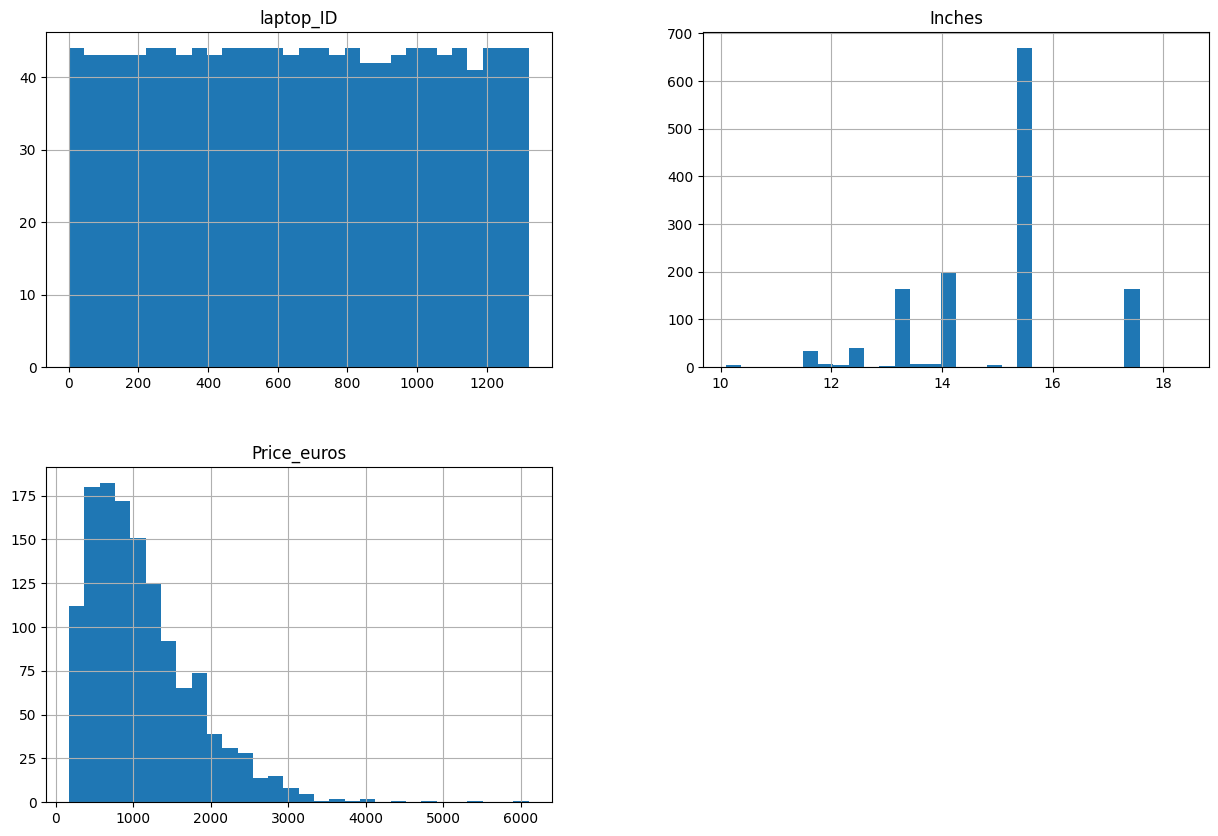

In [19]:
df.hist(bins=30, figsize=(15,10))
plt.show()

In [20]:
df.drop('laptop_ID',axis=1,inplace=True)

In [21]:
df

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00
1299,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00
1300,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00
1301,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00


In [22]:
# Convert 'Ram' to integer
df['Ram'] = df['Ram'].str.replace('GB', '').astype(int)

# Convert 'Weight' to float
df['Weight'] = df['Weight'].str.replace('kg', '').astype(float)

In [23]:
df

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,638.00
1299,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,1499.00
1300,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,229.00
1301,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,764.00


In [24]:
# Extract resolution from 'ScreenResolution'
df['Resolution'] = df['ScreenResolution'].str.extract('(\d+x\d+)')

# Extract panel type (e.g., IPS, Retina)
df['PanelType'] = df['ScreenResolution'].apply(lambda x: 'IPS' if 'IPS' in x else 'Retina' if 'Retina' in x else 'Other')

# Extract processor type and speed from 'Cpu'
df['CpuType'] = df['Cpu'].str.extract('(Intel Core i\d|AMD Ryzen \d)')
df['CpuSpeed'] = df['Cpu'].str.extract('(\d+\.?\d*)GHz').astype(float)

# Extract storage size and type from 'Memory'
df['StorageSize'] = df['Memory'].str.extract('(\d+)').astype(float)
df['StorageType'] = df['Memory'].apply(lambda x: 'SSD' if 'SSD' in x else 'HDD' if 'HDD' in x else 'Hybrid')

# Extract GPU brand and model from 'Gpu'
df['GpuBrand'] = df['Gpu'].str.extract('(Intel|AMD|Nvidia)')
df['GpuModel'] = df['Gpu'].str.extract('(\w+\s*\d+)')

In [25]:
df

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Resolution,PanelType,CpuType,CpuSpeed,StorageSize,StorageType,GpuBrand,GpuModel
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,2560x1600,IPS,Intel Core i5,2.3,128.0,SSD,Intel,Graphics 640
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,1440x900,Other,Intel Core i5,1.8,128.0,Hybrid,Intel,Graphics 6000
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,1920x1080,Other,Intel Core i5,2.5,256.0,SSD,Intel,Graphics 620
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,2880x1800,IPS,Intel Core i7,2.7,512.0,SSD,AMD,Pro 455
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,2560x1600,IPS,Intel Core i5,3.1,256.0,SSD,Intel,Graphics 650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,638.00,1920x1080,IPS,Intel Core i7,2.5,128.0,SSD,Intel,Graphics 520
1299,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,1499.00,3200x1800,IPS,Intel Core i7,2.5,512.0,SSD,Intel,Graphics 520
1300,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,229.00,1366x768,Other,NaN,1.6,64.0,Hybrid,Intel,NaN
1301,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,764.00,1366x768,Other,Intel Core i7,2.5,1.0,HDD,AMD,R5


In [26]:
df.drop(['ScreenResolution', 'Cpu', 'Memory', 'Gpu'], axis=1, inplace=True)

In [27]:
df

,Company,Product,TypeName,Inches,Ram,OpSys,Weight,Price_euros,Resolution,PanelType,CpuType,CpuSpeed,StorageSize,StorageType,GpuBrand,GpuModel
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,2560x1600,IPS,Intel Core i5,2.3,128.0,SSD,Intel,Graphics 640
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,1440x900,Other,Intel Core i5,1.8,128.0,Hybrid,Intel,Graphics 6000
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,1920x1080,Other,Intel Core i5,2.5,256.0,SSD,Intel,Graphics 620
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,2880x1800,IPS,Intel Core i7,2.7,512.0,SSD,AMD,Pro 455
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,2560x1600,IPS,Intel Core i5,3.1,256.0,SSD,Intel,Graphics 650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,4,Windows 10,1.80,638.00,1920x1080,IPS,Intel Core i7,2.5,128.0,SSD,Intel,Graphics 520
1299,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,16,Windows 10,1.30,1499.00,3200x1800,IPS,Intel Core i7,2.5,512.0,SSD,Intel,Graphics 520
1300,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,2,Windows 10,1.50,229.00,1366x768,Other,NaN,1.6,64.0,Hybrid,Intel,NaN
1301,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,6,Windows 10,2.19,764.00,1366x768,Other,Intel Core i7,2.5,1.0,HDD,AMD,R5


In [29]:
import seaborn as sns

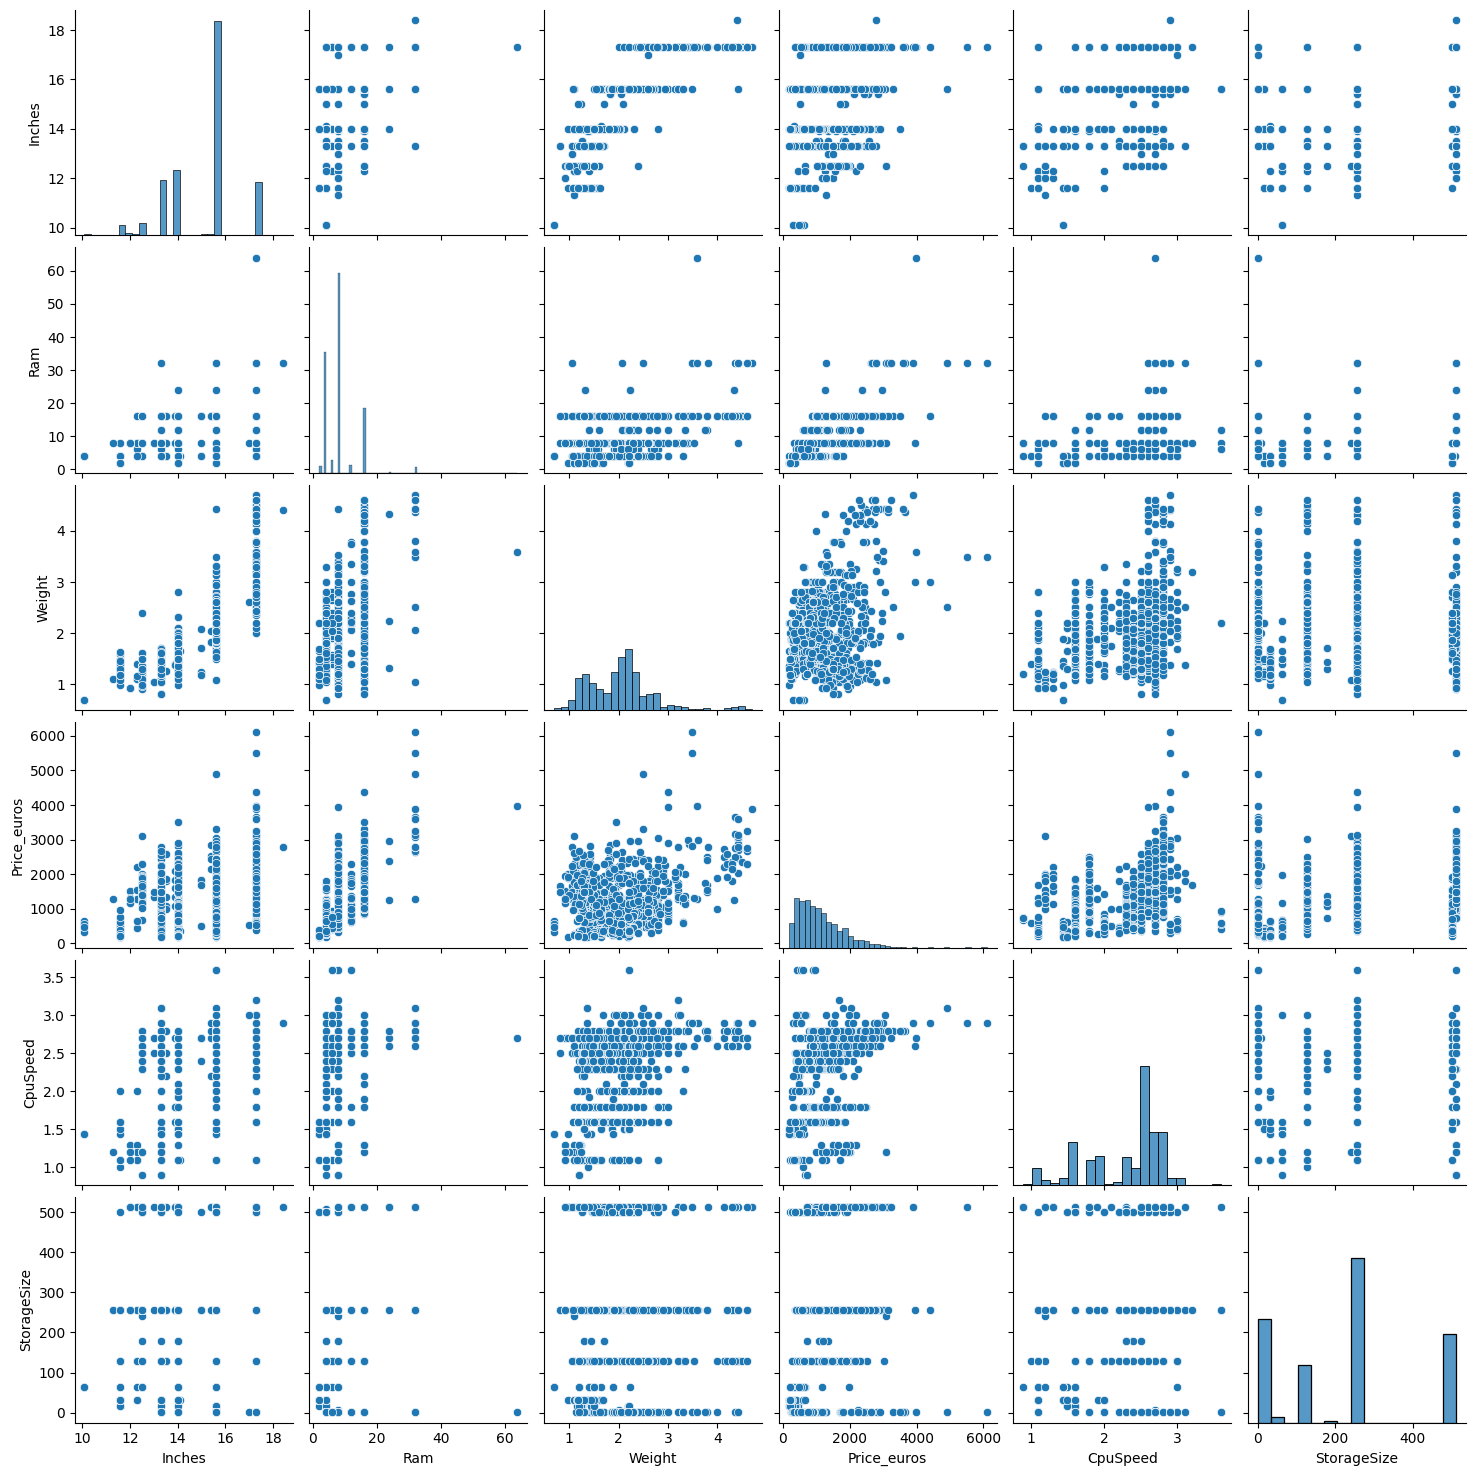

In [31]:
# Pairplot to visualize relationships between numerical features
sns.pairplot(df)
plt.show()


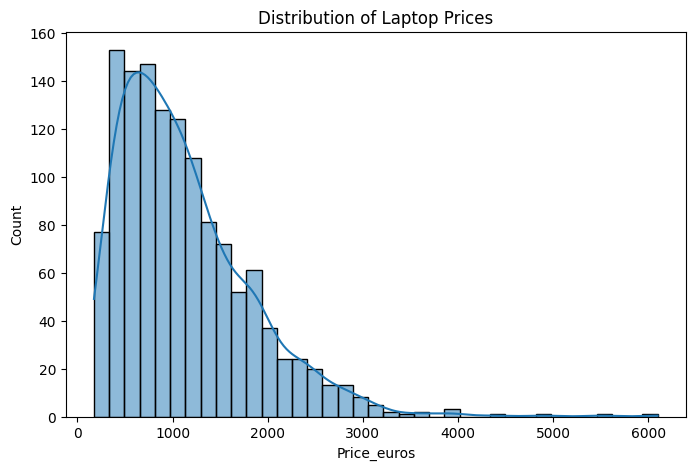

In [33]:
# Distribution of laptop prices
plt.figure(figsize=(8, 5))
sns.histplot(df['Price_euros'], kde=True)
plt.title('Distribution of Laptop Prices')
plt.show()

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [35]:
# Define features (X) and target (y)
X = df.drop('Price_euros', axis=1)  # Features
y = df['Price_euros']  # Target

# First, split into training (80%) and temporary (20%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

# Then, split the temporary set into validation (50%) and testing (50%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Check the sizes of each set
print(f"Training set: {X_train.shape}, {y_train.shape}")
print(f"Validation set: {X_val.shape}, {y_val.shape}")
print(f"Testing set: {X_test.shape}, {y_test.shape}")

Training set: (1042, 15), (1042,)
Validation set: (130, 15), (130,)
Testing set: (131, 15), (131,)


In [43]:
from sklearn.preprocessing import OneHotEncoder

# Update the preprocessor to handle unknown categories
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Recreate the pipeline with the updated preprocessor
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Retrain the model
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['Inches', 'Ram', 'Weight', 'CpuSpeed', 'StorageSize'], dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['Company', 'Product', 'TypeName', 'OpSys', 'Resolution', 'PanelType',
       'CpuType', 'StorageType', 'GpuBrand', 'GpuModel'],
      dtype='object'))])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [44]:
# Predict on the test set
y_pred = model.predict(X_test)

In [45]:
# Calculate Mean Squared Error (MSE) and R-squared (R²)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 113106.06457933938
R-squared: 0.8155042629219632


Testing Mean Squared Error: 113106.06457933938
Testing R-squared: 0.8155042629219632


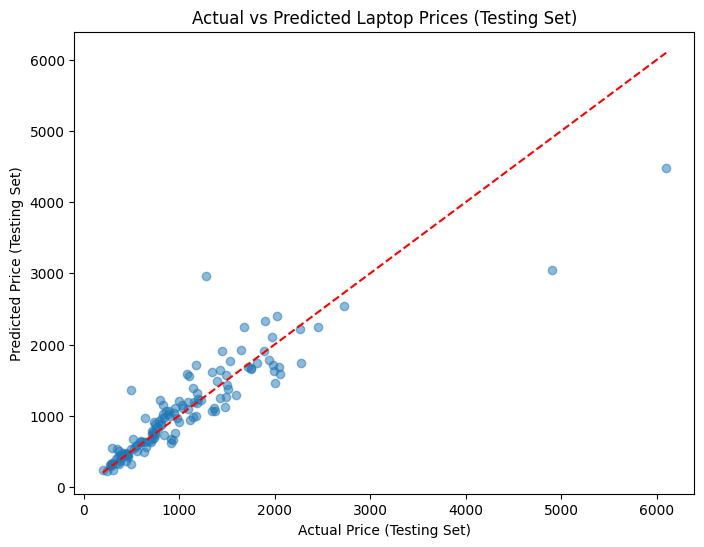

In [47]:
# Predict on the testing set
y_test_pred = model.predict(X_test)

# Calculate metrics for the testing set
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"Testing Mean Squared Error: {mse_test}")
print(f"Testing R-squared: {r2_test}")

# Visualize predictions vs actual values for the testing set
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Price (Testing Set)')
plt.ylabel('Predicted Price (Testing Set)')
plt.title('Actual vs Predicted Laptop Prices (Testing Set)')
plt.show()

In [48]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'regressor__n_estimators': [100, 200, 300],
    'regressor__max_depth': [None, 10, 20],
    'regressor__min_samples_split': [2, 5, 10]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Best parameters
print(f"Best parameters: {grid_search.best_params_}")

# Evaluate on the validation set with the best model
best_model = grid_search.best_estimator_
y_val_pred = best_model.predict(X_val)
mse_val = mean_squared_error(y_val, y_val_pred)
print(f"Validation MSE with best model: {mse_val}")

Best parameters: {'regressor__max_depth': 20, 'regressor__min_samples_split': 2, 'regressor__n_estimators': 200}
Validation MSE with best model: 64646.52152743288
